# Lectura de reclamos

In [1]:
import sys
sys.path.append("../") 

In [2]:
import pandas as pd
import sklearn as sklearn

In [3]:
import os

df=pd.read_excel(
     os.path.join("data", "reclamos_20201221_con_clas.xlsx"),
     engine='openpyxl',
)


In [4]:
df.columns

Index(['CASO_ID', 'MERCADO_ANALISTA', 'DESCRIPCION_CIUDADANO',
       'PETICION_CIUDADANO'],
      dtype='object')

In [5]:
df

,CASO_ID,MERCADO_ANALISTA,DESCRIPCION_CIUDADANO,PETICION_CIUDADANO
0,638428.0,APIA -Reclamo Seguros,RECIBI UN CORREO ELECTRONICO DONDE SE ME INDIC...,DADO QUE NINGUNA DE LAS CAUSALES ANTERIORES SE...
1,580194.0,APIA -Reclamo Seguros,Mi nombre es XX y el día 27 de Enero de este a...,Necesito que Metlife me deposite el dinero sol...
2,447321.0,APIA -Reclamo Seguros,Estimados Señores SVS\n\nCon fecha 13 de Octub...,Por esta razón quiero colocar un reclamo forma...
3,437201.0,APIA -Reclamo Seguros,En primera instancia solicité renvar mi tarjet...,Solicito devolución de lo que me cobraron por ...
4,385926.0,Reclamo Valores,reclamo en contra Scotiabank por cobros de man...,condonacion de los cobros que hace el Banco.
...,...,...,...,...
1000,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN


In [6]:
df['MERCADO_ANALISTA']=df['MERCADO_ANALISTA'].astype('category')

In [7]:
df=df[['MERCADO_ANALISTA','PETICION_CIUDADANO','DESCRIPCION_CIUDADANO']].dropna()

In [8]:
df['DESCRIPCION_CIUDADANO']=df['DESCRIPCION_CIUDADANO'].map(str).str.lower()
df['PETICION_CIUDADANO']=df['PETICION_CIUDADANO'].map(str).str.lower()

In [9]:
df['data'] = df['DESCRIPCION_CIUDADANO'] + df['PETICION_CIUDADANO']

In [10]:
import string, re

def remove_punct(x):
    comp = re.compile("[%s\d]" % re.escape(string.punctuation))
    return " ".join(comp.sub(" ", str(x)).split()).lower()

df['data']=df['data'].apply(remove_punct)

In [11]:
import unicodedata

def strip_accents(string, accents=('COMBINING ACUTE ACCENT', 'COMBINING GRAVE ACCENT', 'COMBINING TILDE')):
    accents = set(map(unicodedata.lookup, accents))
    chars = [c for c in unicodedata.normalize('NFD', string) if c not in accents]
    return unicodedata.normalize('NFC', ''.join(chars))

df['data'] = df['data'].apply(strip_accents)
print(df['data'] )


0      recibi un correo electronico donde se me indic...
1      mi nombre es xx y el dia de enero de este ano ...
2      estimados senores svs con fecha de octubre de ...
3      en primera instancia solicite renvar mi tarjet...
4      reclamo en contra scotiabank por cobros de man...
                             ...                        
994    estimados por favor revisar el proceso de fusi...
995    con fecha de febrero del me fueron protestados...
996    mal calculo de valor poliza de ahorro por erro...
997    estimados svs con fecha se me ha anulado una o...
998    tengo un traspaso de dos mil quinientas accion...
Name: data, Length: 999, dtype: object


In [12]:
df['data'][0]

'recibi un correo electronico donde se me indica que zurich santander seguros ha decidido no renovar la poliza nº xx super seguro alivio seguro familiar por un nuevo periodo conforme al articulo de las condiciones generales de su seguro pol segun he revisado la pol corresponde a una poliza de prestaciones medicas la cual esta prohibida por resolucion n° de ademas revisando antecedentes entiendo que la compania no puede poner termino unilateral a dicho seguro a menos que se cumpla alguna de las causales como “no pago de la prima cambio de lo que se aseguro omision o falseo de informacion por parte del cliente perdida total o parcial destruccion de los riesgos o lo asegurado tras firmar el contrato aun si el evento tiene o no cobertura cambio en la moneda de la poliza” dado que ninguna de las causales anteriores se cumple es que vengo a solicitar a uds intervengan en esta decision unilateral de la compania y se rechaze la no renovacion de mi poliza tomada hace anos'

In [13]:
stop_words = [line.strip() for line in  open("stopwords-filter-es.txt", "r")]

In [14]:
df['data']=df['data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [15]:
df['data'][0]

'recibi correo electronico indica zurich santander seguros decidido renovar poliza nº xx super seguro alivio seguro familiar nuevo periodo conforme articulo condiciones generales seguro pol segun revisado pol corresponde poliza prestaciones medicas prohibida resolucion n° ademas revisando antecedentes entiendo compania puede poner termino unilateral dicho seguro menos cumpla alguna causales “no pago prima cambio aseguro omision falseo informacion parte cliente perdida total parcial destruccion riesgos asegurado tras firmar contrato aun si evento cobertura cambio moneda poliza” dado ninguna causales anteriores cumple vengo solicitar uds intervengan decision unilateral compania rechaze renovacion poliza tomada hace anos'

In [16]:
labels=(df['MERCADO_ANALISTA']=='Reclamo Valores').astype(int)

In [17]:
df['data'].values[0]

'recibi correo electronico indica zurich santander seguros decidido renovar poliza nº xx super seguro alivio seguro familiar nuevo periodo conforme articulo condiciones generales seguro pol segun revisado pol corresponde poliza prestaciones medicas prohibida resolucion n° ademas revisando antecedentes entiendo compania puede poner termino unilateral dicho seguro menos cumpla alguna causales “no pago prima cambio aseguro omision falseo informacion parte cliente perdida total parcial destruccion riesgos asegurado tras firmar contrato aun si evento cobertura cambio moneda poliza” dado ninguna causales anteriores cumple vengo solicitar uds intervengan decision unilateral compania rechaze renovacion poliza tomada hace anos'

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

n_documents = df.shape[0]
count_vectorizer = CountVectorizer(input='content', binary=True,max_df=0.25, min_df=1.01/n_documents) 
train_binary_bag_of_words = count_vectorizer.fit_transform(df['data']).todense() 


In [19]:
train_binary_bag_of_words.shape

(999, 5563)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_binary_bag_of_words, labels, test_size=0.2)

In [21]:
type(X_train)

numpy.matrix

In [22]:
import numpy as np
from mxnet import npx 

y_train=np.expand_dims(y_train,axis=1).astype(np.int32)
y_test=np.expand_dims(y_test,axis=1).astype(np.int32)


In [23]:
type(X_test)

numpy.matrix

In [24]:
y_train.shape

(799, 1)

# MXNET

In [25]:
import argparse, time, logging, random, math
import mxnet as mx

from mxnet import gluon, nd
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms

In [26]:
num_gpus = 1
model_ctx = mx.cpu()

num_workers = 0
batch_size = 64 

def transform(data, label):
    data = data.reshape(-1,1).astype('float32')
    return data, label

dataset_train = gluon.data.dataset.ArrayDataset(X_train, y_train)
data_loader_train = gluon.data.DataLoader(dataset_train.transform(transform),batch_size = 64,num_workers = 0)
dataset_test = gluon.data.dataset.ArrayDataset(X_test, y_test)
data_loader_test = gluon.data.DataLoader(dataset_test.transform(transform),batch_size = 64,num_workers = 0)

In [27]:
X_train.shape

(799, 5563)

In [80]:
for X,y in data_loader_train:
    print(type(X))
    print(X.shape)
    print(y.shape)
    break

<class 'mxnet.ndarray.ndarray.NDArray'>
(64, 5563, 1)
(64, 1)


In [53]:
X.dtype

numpy.float32

In [54]:
import mxnet as mx
from mxnet import nd, autograd, gluon
hyper={'alpha':10.}
in_units=X_train.shape[1]
out_units=1
embedding_dim=100

# SGD

In [55]:
import sys
sys.path.append("../hamiltonian_mxnet/") 
import mxnet as mx
from hamiltonian.inference.sgd import sgd
from hamiltonian.models.logistic import logistic


#model=embeddings_logistic(hyper,in_units,out_units,0,32,maxlen,embedding_dim,ctx=model_ctx)
model=logistic(hyper,in_units,ctx=model_ctx)
inference=sgd(model,model.par,step_size=0.001,ctx=model_ctx)


In [56]:
import hamiltonian
import importlib

try:
    importlib.reload(hamiltonian.models.logistic)
    importlib.reload(hamiltonian.inference.sgd)
    print('modules re-loaded')
except:
    print('no modules loaded yet')


modules re-loaded


In [62]:
par,loss=inference.fit(epochs=100,batch_size=batch_size,data_loader=data_loader_train,verbose=True)

  7%|▋         | 7/100 [00:00<00:03, 28.71it/s]

loss: 0.6839


 15%|█▌        | 15/100 [00:00<00:02, 31.12it/s]

loss: 0.5084


 27%|██▋       | 27/100 [00:00<00:02, 32.14it/s]

loss: 0.4455


 35%|███▌      | 35/100 [00:01<00:02, 31.44it/s]

loss: 0.3995


 47%|████▋     | 47/100 [00:01<00:01, 32.16it/s]

loss: 0.3631


 55%|█████▌    | 55/100 [00:01<00:01, 32.08it/s]

loss: 0.3334


 67%|██████▋   | 67/100 [00:02<00:01, 31.85it/s]

loss: 0.3089


 75%|███████▌  | 75/100 [00:02<00:00, 31.79it/s]

loss: 0.2883


 87%|████████▋ | 87/100 [00:02<00:00, 31.88it/s]

loss: 0.2706


 95%|█████████▌| 95/100 [00:03<00:00, 31.57it/s]

loss: 0.2553


100%|██████████| 100/100 [00:03<00:00, 31.54it/s]


## SGD UQ

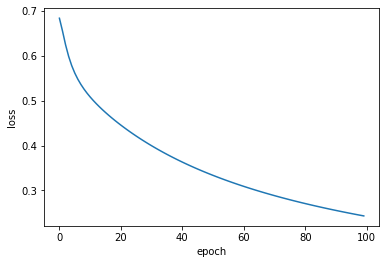

In [63]:
import matplotlib.pyplot as plt

plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [64]:
from sklearn.metrics import classification_report

total_samples,total_labels,log_like=inference.predict(par,batch_size=batch_size,num_samples=10,data_loader=data_loader_test)
y_hat=np.quantile(total_samples,0.5,axis=0)
print(classification_report(np.int32(total_labels),np.int32(y_hat)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       125
           1       0.98      0.67      0.80        67

    accuracy                           0.88       192
   macro avg       0.91      0.83      0.86       192
weighted avg       0.89      0.88      0.87       192



# SGLD

In [66]:
import mxnet as mx
from mxnet import nd, autograd, gluon
model_ctx=mx.cpu()
hyper={'alpha':10.}
in_units=X_train.shape[1]


In [71]:
import mxnet as mx
from hamiltonian.inference.sgld import sgld
from hamiltonian.models.logistic import logistic

model=logistic(hyper,in_units,ctx=model_ctx)
inference=sgld(model,model.par,step_size=0.1,ctx=model_ctx)

In [72]:
import importlib
import hamiltonian
importlib.reload(hamiltonian.models.logistic)
importlib.reload(hamiltonian.inference.sgld)

<module 'hamiltonian.inference.sgld' from '../hamiltonian_mxnet/hamiltonian/inference/sgld.py'>

In [73]:
loss,posterior_samples=inference.sample(epochs=100,batch_size=batch_size,
                                data_loader=data_loader_train,
                                verbose=True,chain_name='chain_nonhierarchical')

  5%|▌         | 5/100 [00:00<00:03, 23.86it/s]

loss: 6.7171


 14%|█▍        | 14/100 [00:00<00:03, 27.57it/s]

loss: 0.3348


 26%|██▌       | 26/100 [00:00<00:02, 28.72it/s]

loss: 0.1637


 35%|███▌      | 35/100 [00:01<00:02, 28.06it/s]

loss: 0.1687


 44%|████▍     | 44/100 [00:01<00:02, 27.65it/s]

loss: 0.1470


 56%|█████▌    | 56/100 [00:02<00:01, 27.24it/s]

loss: 0.1313


 65%|██████▌   | 65/100 [00:02<00:01, 27.44it/s]

loss: 0.1469


 74%|███████▍  | 74/100 [00:02<00:00, 27.37it/s]

loss: 0.1434


 86%|████████▌ | 86/100 [00:03<00:00, 27.08it/s]

loss: 0.1332


 95%|█████████▌| 95/100 [00:03<00:00, 27.15it/s]

loss: 0.1343


  6%|▌         | 6/100 [00:00<00:03, 29.30it/s]

loss: 6.4735


 15%|█▌        | 15/100 [00:00<00:02, 29.69it/s]

loss: 0.2205


 25%|██▌       | 25/100 [00:00<00:02, 29.57it/s]

loss: 0.1774


 35%|███▌      | 35/100 [00:01<00:02, 29.51it/s]

loss: 0.1563


 44%|████▍     | 44/100 [00:01<00:01, 28.99it/s]

loss: 0.1511


 54%|█████▍    | 54/100 [00:01<00:01, 29.70it/s]

loss: 0.1486


 64%|██████▍   | 64/100 [00:02<00:01, 29.56it/s]

loss: 0.1346


 76%|███████▌  | 76/100 [00:02<00:00, 29.33it/s]

loss: 0.0366


 85%|████████▌ | 85/100 [00:02<00:00, 28.88it/s]

loss: 0.0234


 95%|█████████▌| 95/100 [00:03<00:00, 29.57it/s]

loss: 0.0231


100%|██████████| 100/100 [00:03<00:00, 29.35it/s]


## SGLD UQ

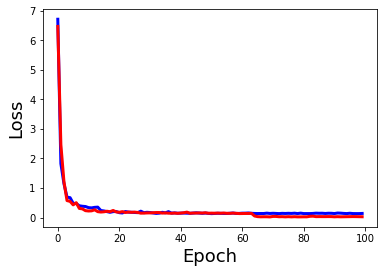

In [74]:
import matplotlib.pyplot as plt

plt.plot(loss[0],color='blue',lw=3)
plt.plot(loss[1],color='red',lw=3)
plt.xlabel('Epoch', size=18)
plt.ylabel('Loss', size=18)
plt.show()

In [75]:
posterior_samples_flat=[item for sublist in posterior_samples for item in sublist]

In [76]:
total_samples,total_labels,log_like=inference.predict(posterior_samples_flat,5,data_loader=data_loader_test)

In [77]:
from sklearn.metrics import classification_report
posterior_samples

y_hat=np.quantile(total_samples,.5,axis=0)

print(classification_report(np.int32(total_labels),np.int32(y_hat)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       132
           1       0.90      0.76      0.83        68

    accuracy                           0.89       200
   macro avg       0.89      0.86      0.87       200
weighted avg       0.89      0.89      0.89       200



In [78]:
from hamiltonian.utils.psis import *

loo,loos,ks=psisloo(np.array(log_like[:,:,0]))

# BBB

In [171]:
import mxnet as mx
from hamiltonian.inference.bbb import bbb
from hamiltonian.models.logistic import logistic

model=logistic(hyper,in_units,ctx=model_ctx)
inference=bbb(model,model.par,step_size=0.05,ctx=model_ctx)

In [172]:
import importlib
import hamiltonian
importlib.reload(hamiltonian.models.logistic)
importlib.reload(hamiltonian.inference.bbb)

<module 'hamiltonian.inference.bbb' from '../hamiltonian_mxnet/hamiltonian/inference/bbb.py'>

In [175]:
par,loss,(means,sigmas)=inference.fit(epochs=50,batch_size=32,
                             data_loader=data_loader_train,
                             verbose=False)

100%|██████████| 50/50 [00:02<00:00, 24.09it/s]


## BBB UQ

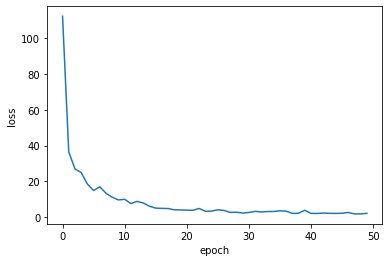

In [176]:
import matplotlib.pyplot as plt

plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [205]:
from sklearn.metrics import classification_report

total_samples,total_labels,log_like=inference.predict(means,sigmas,batch_size=batch_size,num_samples=100,data_loader=data_loader_test)
y_hat=np.quantile(total_samples,.5,axis=0)
print(classification_report(np.int32(y_test),np.int32(y_hat)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       132
           1       0.92      0.81      0.86        68

    accuracy                           0.91       200
   macro avg       0.91      0.89      0.90       200
weighted avg       0.91      0.91      0.91       200

